In [2]:
import backtrader as bt
from datetime import datetime

<IPython.core.display.Javascript object>


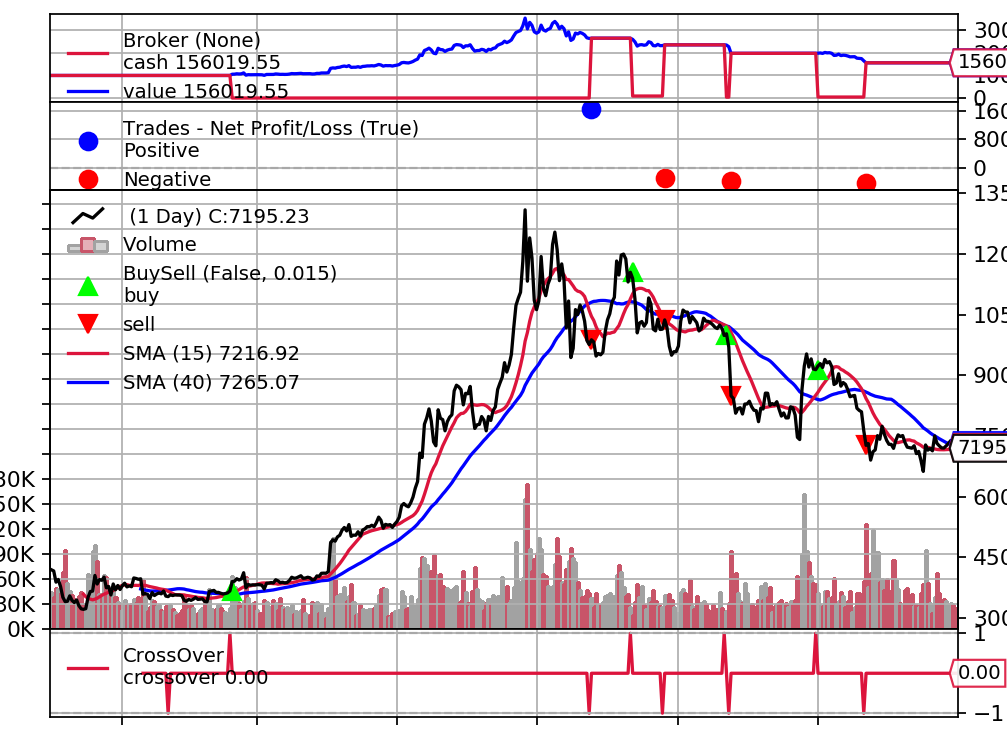

[[<Figure size 640x480 with 5 Axes>]]

In [3]:


# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceData(dataname='MSFT',
                                 fromdate=datetime(2011, 1, 1),
                                 todate=datetime(2012, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

In [6]:
from fastquant import get_crypto_data
crypto = get_crypto_data("BTC/USDT", "2018-12-01", "2019-12-31")

In [9]:
from fastquant import backtest
backtest('smac', crypto, fast_period=15, slow_period=40)

Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
stop_loss : None
stop_trail : None
===Strategy level arguments===
fast_period : 15
slow_period : 40
2019-02-17, BUY CREATE, 3667.58
2019-02-17, Cash: 100000.0
2019-02-17, Price: 3667.58
2019-02-17, Buy prop size: 27
2019-02-17, Afforded size: 27
2019-02-17, Final size: 27
2019-02-18, BUY EXECUTED, Price: 3667.58, Cost: 99024.66, Comm: 742.68, Size: 27.00
2019-07-24, SELL CREATE, 9879.87
2019-07-25, SELL EXECUTED, Price: 9879.87, Cost: 99024.66, Comm: 2000.67, Size: -27.00
2019-07-25, OPERATION PROFIT, GROSS: 167731.83, NET: 164988.47
2019-08-11, BUY CREATE, 11549.97
2019-08-11, Cash: 264988.47137499996
2019-08-11, Price: 11549.97
2019-08-11, Buy prop size: 22
2019-08-11, Afforded size: 22
2019-08-11, Final size: 22
2019-08-12, BUY EXECUTED, Price: 11549.97, Cost: 254099.34, Comm: 1905.75, Size: 22.00
2019-08-25, SELL CREATE, 10372.25
2019-08-26, SELL EXECUT

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,...,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,None,None,close,None,None,...,32.718693,188,55.897437,197745.709,"{'len': 188, 'drawdown': 55.89743655635467, 'm...",55.897437,188,0.964298,56019.55,156019.54605
